In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt


In [7]:
# @title Define the functions that build and train a model
def build_model(my_learning_rate):
    """Create and compile a simple linear regression model."""
    # Most simple tf.keras models are sequential.
    # A sequential model contains one or more layers.
    model = tf.keras.models.Sequential()

    # Describe the topography of the model.
    # The topography of a simple linear regression model
    # is a single node in a single layer.
    model.add(tf.keras.layers.Dense(units=1,
                                    input_shape=(1,)))

    # Compile the model topography into code that
    # TensorFlow can efficiently execute. Configure
    # training to minimize the model's mean squared error.
    model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model


def train_model(model, feature, label, epochs, batch_size):
    """Train the model by feeding it data."""

    # Feed the feature values and the label values to the
    # model. The model will train for the specified number
    # of epochs, gradually learning how the feature values
    # relate to the label values.
    history = model.fit(x=feature,
                        y=label,
                        batch_size=batch_size,
                        epochs=epochs)

    # Gather the trained model's weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    # The list of epochs is stored separately from the
    # rest of history.
    epochs = history.epoch

    # Gather the history (a snapshot) of each epoch.
    hist = pd.DataFrame(history.history)

    # Specifically gather the model's root mean
    # squared error at each epoch.
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse


print("Defined build_model and train_model")


Defined build_model and train_model


In [8]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against the training feature and label."""
    plt.figure()
    plt.xlabel("Feature")
    plt.ylabel("Label")
    plt.title("Trained model vs. training data")

    # Plot the feature values vs. label values.
    plt.scatter(feature, label, alpha=0.5, label="Training data")

    # Create a red line representing the model.
    x = np.linspace(np.array(feature).min(), np.array(feature).max(), 100)
    y = np.squeeze(trained_weight) * x + trained_bias
    plt.plot(x, y, 'r', label="Trained model")

    plt.legend()
    plt.grid(True)
    plt.savefig("model_plot.png")
    plt.show()


def plot_the_loss_curve(epochs, rmse):
    """Plot the loss curve, which shows loss vs. epoch."""
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error (RMSE)")
    plt.title("RMSE vs. Epoch")

    plt.plot(epochs, rmse, 'b', label="Training RMSE")
    plt.scatter(epochs, rmse, c='b')

    min_rmse_index = np.argmin(rmse)
    min_rmse_value = np.round(rmse[min_rmse_index], 3)
    plt.annotate(f"Min RMSE={min_rmse_value}", xy=(min_rmse_index, min_rmse_value), xytext=(min_rmse_index, min_rmse_value+0.5),
                 arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

    plt.legend()
    plt.grid(True)
    plt.savefig("loss_curve.png")
    plt.show()


print("Defined the plot_the_model and plot_the_loss_curve functions.")


Defined the plot_the_model and plot_the_loss_curve functions.


In [9]:
my_feature = [1.0, 2.0,  3.0,  4.0,  5.0,
              6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0]
my_label = [5.0, 8.8,  9.6, 14.2, 18.8,
            19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2]


Epoch 1/14
3/3 [==============================] - 1s 7ms/step - loss: 38.3749 - root_mean_squared_error: 6.1947
Epoch 2/14
3/3 [==============================] - 0s 6ms/step - loss: 1.6340 - root_mean_squared_error: 1.2783
Epoch 3/14
3/3 [==============================] - 0s 4ms/step - loss: 2.1781 - root_mean_squared_error: 1.4758
Epoch 4/14
3/3 [==============================] - 0s 3ms/step - loss: 1.2665 - root_mean_squared_error: 1.1254
Epoch 5/14
3/3 [==============================] - 0s 6ms/step - loss: 1.4430 - root_mean_squared_error: 1.2012
Epoch 6/14
3/3 [==============================] - 0s 3ms/step - loss: 6.4320 - root_mean_squared_error: 2.5361
Epoch 7/14
3/3 [==============================] - 0s 8ms/step - loss: 1.2538 - root_mean_squared_error: 1.1197
Epoch 8/14
3/3 [==============================] - 0s 5ms/step - loss: 1.9137 - root_mean_squared_error: 1.3834
Epoch 9/14
3/3 [==============================] - 0s 5ms/step - loss: 6.7620 - root_mean_squared_error: 2.6004


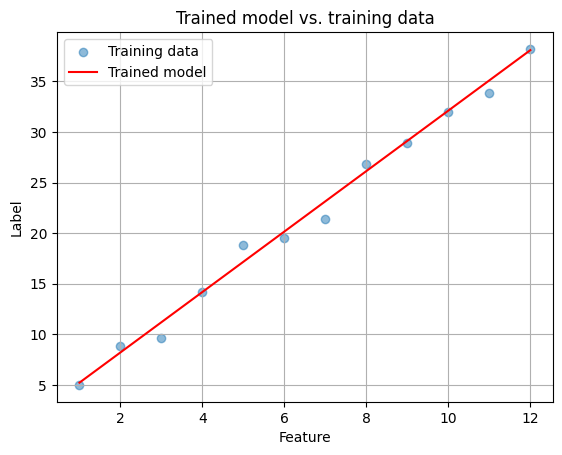

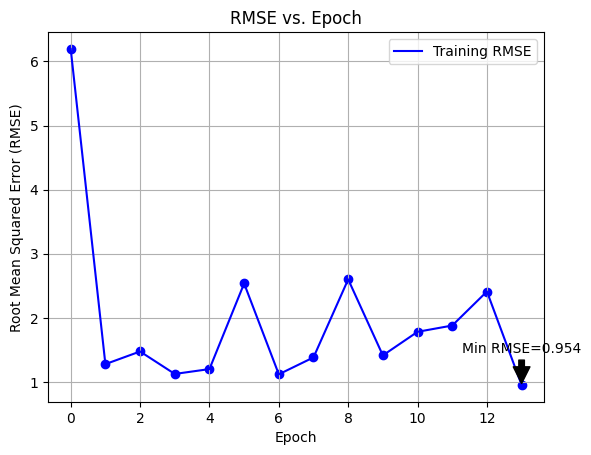

In [26]:
learning_rate = 0.35
epochs = 14
my_batch_size = 4

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)
